<a href="https://colab.research.google.com/github/Shinhuynry/AI/blob/main/Homework_week9_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical #Để chuyển thành one hot encoding
from keras.models import load_model
import numpy as np     

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

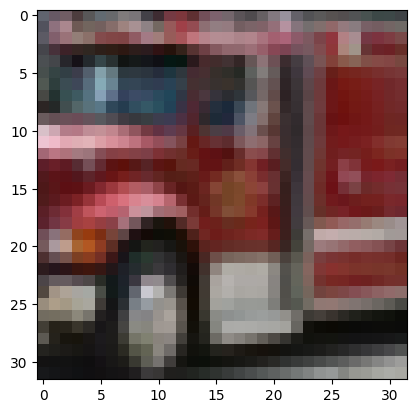

In [10]:
hinh = train_images[88]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
train_images = train_images.reshape((50000,32*32*3)) #Chuyển về input 1 chiều
train_images = train_images.astype('float32')/255 #Ảnh có giá trị 0-->255, Scale xuống thành 0-->1
test_images =  test_images.reshape((10000, 32*32*3)) #Chuyển về input 1 chiều
test_images = test_images.astype('float32')/255
train_images.shape

(50000, 3072)

In [13]:
train_labels = to_categorical(train_labels, 10) #One hot encoding
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [15]:
model = Sequential()
model.add(Dense(512,input_shape = (32*32*3,), activation='relu', name="Layer_1"))
model.add(Dense(256, activation='relu', name="Layer_2"))
model.add(Dense(128, activation='relu', name="Layer_3"))
model.add(Dense(64, activation='relu', name="Layer_4"))
model.add(Dense(32, activation='relu', name="Layer_5"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Layer_4 (Dense)             (None, 64)                8256      
                                                                 
 Layer_5 (Dense)             (None, 32)                2080      
                                                                 
 Output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 1,748,266
Trainable params: 1,748,266
No

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 16s 37ms/step - loss: 2.0643 - accuracy: 0.2344
Epoch 2/10
391/391 [==============================] - 14s 36ms/step - loss: 1.8307 - accuracy: 0.3371
Epoch 3/10
391/391 [==============================] - 14s 36ms/step - loss: 1.7388 - accuracy: 0.3762
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 1.6696 - accuracy: 0.4036
Epoch 5/10
391/391 [==============================] - 14s 36ms/step - loss: 1.6187 - accuracy: 0.4223
Epoch 6/10
391/391 [==============================] - 14s 35ms/step - loss: 1.5696 - accuracy: 0.4373
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 1.5316 - accuracy: 0.4522
Epoch 8/10
391/391 [==============================] - 14s 36ms/step - loss: 1.5005 - accuracy: 0.4642
Epoch 9/10
391/391 [==============================] - 14s 36ms/step - loss: 1.4703 - accuracy: 0.4751
Epoch 10/10
391/391 [==============================] - 14s 36ms/step - loss: 1.445

In [17]:
model.fit(train_images, train_labels, epochs=40, batch_size=128)

Epoch 1/40
391/391 [==============================] - 14s 36ms/step - loss: 1.4175 - accuracy: 0.4930
Epoch 2/40
391/391 [==============================] - 14s 36ms/step - loss: 1.3896 - accuracy: 0.5033
Epoch 3/40
391/391 [==============================] - 14s 37ms/step - loss: 1.3715 - accuracy: 0.5114
Epoch 4/40
391/391 [==============================] - 15s 38ms/step - loss: 1.3490 - accuracy: 0.5178
Epoch 5/40
391/391 [==============================] - 14s 35ms/step - loss: 1.3265 - accuracy: 0.5251
Epoch 6/40
391/391 [==============================] - 15s 38ms/step - loss: 1.3025 - accuracy: 0.5341
Epoch 7/40
391/391 [==============================] - 14s 35ms/step - loss: 1.2818 - accuracy: 0.5395
Epoch 8/40
391/391 [==============================] - 14s 36ms/step - loss: 1.2635 - accuracy: 0.5472
Epoch 9/40
391/391 [==============================] - 14s 36ms/step - loss: 1.2470 - accuracy: 0.5537
Epoch 10/40
391/391 [==============================] - 14s 36ms/step - loss: 1.228

In [18]:
model.fit(train_images, train_labels, epochs=40, batch_size=256)

Epoch 1/40
196/196 [==============================] - 11s 54ms/step - loss: 0.7409 - accuracy: 0.7324
Epoch 2/40
196/196 [==============================] - 11s 55ms/step - loss: 0.7253 - accuracy: 0.7390
Epoch 3/40
196/196 [==============================] - 11s 56ms/step - loss: 0.7127 - accuracy: 0.7428
Epoch 4/40
196/196 [==============================] - 11s 56ms/step - loss: 0.6971 - accuracy: 0.7491
Epoch 5/40
196/196 [==============================] - 11s 55ms/step - loss: 0.6865 - accuracy: 0.7508
Epoch 6/40
196/196 [==============================] - 10s 49ms/step - loss: 0.6828 - accuracy: 0.7533
Epoch 7/40
196/196 [==============================] - 11s 56ms/step - loss: 0.6677 - accuracy: 0.7575
Epoch 8/40
196/196 [==============================] - 11s 56ms/step - loss: 0.6589 - accuracy: 0.7636
Epoch 9/40
196/196 [==============================] - 12s 62ms/step - loss: 0.6560 - accuracy: 0.7636
Epoch 10/40
196/196 [==============================] - 11s 56ms/step - loss: 0.638

In [19]:
model.fit(train_images, train_labels, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 11s 56ms/step - loss: 0.4677 - accuracy: 0.8337
Epoch 2/20
196/196 [==============================] - 11s 56ms/step - loss: 0.4600 - accuracy: 0.8360
Epoch 3/20
196/196 [==============================] - 11s 56ms/step - loss: 0.4556 - accuracy: 0.8372
Epoch 4/20
196/196 [==============================] - 11s 56ms/step - loss: 0.4572 - accuracy: 0.8369
Epoch 5/20
196/196 [==============================] - 10s 49ms/step - loss: 0.4511 - accuracy: 0.8391
Epoch 6/20
196/196 [==============================] - 11s 56ms/step - loss: 0.4440 - accuracy: 0.8428
Epoch 7/20
196/196 [==============================] - 11s 56ms/step - loss: 0.4401 - accuracy: 0.8430
Epoch 8/20
196/196 [==============================] - 11s 56ms/step - loss: 0.4357 - accuracy: 0.8426
Epoch 9/20
196/196 [==============================] - 11s 56ms/step - loss: 0.4371 - accuracy: 0.8440
Epoch 10/20
196/196 [==============================] - 11s 54ms/step - loss: 0.438

In [20]:
model.fit(train_images, train_labels, epochs=20, batch_size=256)


Epoch 1/20
196/196 [==============================] - 11s 56ms/step - loss: 0.3911 - accuracy: 0.8615
Epoch 2/20
196/196 [==============================] - 11s 56ms/step - loss: 0.3923 - accuracy: 0.8617
Epoch 3/20
196/196 [==============================] - 11s 56ms/step - loss: 0.3959 - accuracy: 0.8609
Epoch 4/20
196/196 [==============================] - 10s 52ms/step - loss: 0.3838 - accuracy: 0.8643
Epoch 5/20
196/196 [==============================] - 10s 53ms/step - loss: 0.3780 - accuracy: 0.8661
Epoch 6/20
196/196 [==============================] - 12s 61ms/step - loss: 0.3859 - accuracy: 0.8651
Epoch 7/20
196/196 [==============================] - 11s 56ms/step - loss: 0.3807 - accuracy: 0.8667
Epoch 8/20
196/196 [==============================] - 11s 56ms/step - loss: 0.3789 - accuracy: 0.8671
Epoch 9/20
196/196 [==============================] - 11s 56ms/step - loss: 0.3796 - accuracy: 0.8659
Epoch 10/20
196/196 [==============================] - 10s 53ms/step - loss: 0.378

In [21]:
model.fit(train_images, train_labels, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 11s 57ms/step - loss: 0.3484 - accuracy: 0.8773
Epoch 2/20
196/196 [==============================] - 11s 56ms/step - loss: 0.3409 - accuracy: 0.8821
Epoch 3/20
196/196 [==============================] - 11s 56ms/step - loss: 0.3449 - accuracy: 0.8797
Epoch 4/20
196/196 [==============================] - 12s 60ms/step - loss: 0.3337 - accuracy: 0.8836
Epoch 5/20
196/196 [==============================] - 10s 53ms/step - loss: 0.3376 - accuracy: 0.8824
Epoch 6/20
196/196 [==============================] - 11s 56ms/step - loss: 0.3317 - accuracy: 0.8843
Epoch 7/20
196/196 [==============================] - 11s 57ms/step - loss: 0.3368 - accuracy: 0.8839
Epoch 8/20
196/196 [==============================] - 11s 57ms/step - loss: 0.3339 - accuracy: 0.8842
Epoch 9/20
196/196 [==============================] - 11s 57ms/step - loss: 0.3287 - accuracy: 0.8860
Epoch 10/20
196/196 [==============================] - 11s 55ms/step - loss: 0.331

1/1 [==============================] - 1s 667ms/step


<ipython-input-22-3bfb2f671bb0>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


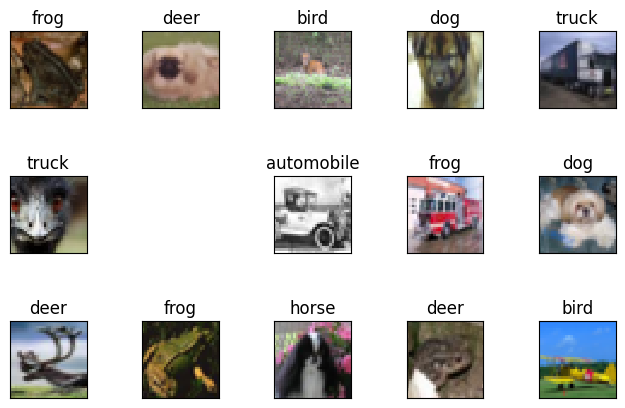

In [22]:
x_sample = test_images[30:45]
pred = np.argmax(model.predict(x_sample), axis=-1)
x_sample = np.reshape(x_sample, (15,32, 32,3))
class_name = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_sample[i], cmap='gray', interpolation='none')
  plt.title('{}'.format(class_name[pred[i]]))
  plt.xticks([])
  plt.yticks([])